<a href="https://colab.research.google.com/github/AnnaK8090/CIND-820_Big-Data-Analytics-Project/blob/main/4_Collaborative_Filtering_Matrix_Factorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Collaborative Filtering: Matrix Factorization (ALS) Model

In [1]:
# 1. Importing libraries:
import numpy as np 
import pandas as pd      

In [2]:
# 2. Loading csv file and saving it into a dataframe:
result= pd.read_csv('result1.csv', on_bad_lines='skip')

In [3]:
result.shape

(11375, 4)

In [4]:
result.head()

,customer_unique_id,product_id,product_category_name_english,review_score
0,00053a61a98854899e70ed204dd4bafe,58727e154e8e85d84052cd22b0136c84,sports_leisure,1
1,00053a61a98854899e70ed204dd4bafe,62984ea1bba7fcea1f5b57084d3bf885,sports_leisure,1
2,000de6019bb59f34c099a907c151d855,9e572ff4654f7064419d97a891a8b0fc,bed_bath_table,2
3,000de6019bb59f34c099a907c151d855,af0a917aec9cea3b353ece61a8825326,bed_bath_table,2
4,000fbf0473c10fc1ab6f8d2d286ce20c,38021cef829efa264df6f9d21c4df6e9,musical_instruments,5


In [ ]:
result.shape

(11375, 4)

In [5]:
n_users = result.customer_unique_id.unique().shape[0]
n_items = result.product_id.unique().shape[0]

In [6]:
# 3. User-Item matrix

matrix = result.pivot_table(index='customer_unique_id', columns='product_id', values='review_score')
matrix.head()

product_id,0011c512eb256aa0dbbb544d8dffcf6e,001b72dfd63e9833e8c02742adf472e3,00210e41887c2a8ef9f791ebc780cc36,00250175f79f584c14ab5cecd80553cd,002959d7a0b0990fe2d69988affcbc80,0042f1a9a7e0edd1400c6cd0fda065f8,005030ef108f58b46b78116f754d8d38,0060b415594c5e1200324ef1a18493c4,007c63ae4b346920756b5adcad8095de,008cff0e5792219fae03e570f980b330,...,ff96895c6b1d31f34b2d82f86670fa85,ffaaddefb271481c66d4bd79844ecdae,ffb2e8c1ddc7c3e590d2bc4c91de53e1,ffbb3c00e9687ad738ace3977e821da5,ffbbf6b9097237a1122f17e7341a3fb2,ffbc83054b3741a8d67fc59d9cf9d42d,ffc0b406806006602c5853b00ab5f7fd,ffcfaba393e8ef71937c6e8421bc2868,ffd4bf4306745865e5692f69bd237893,ffe8083298f95571b4a66bfbc1c05524
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
00053a61a98854899e70ed204dd4bafe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000de6019bb59f34c099a907c151d855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000fbf0473c10fc1ab6f8d2d286ce20c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001926cef41060fae572e2e7b30bd2a4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001928b561575b2821c92254a2327d06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matrix.shape

(5167, 7448)

In [7]:
# 4. Transforming matrix into array:
matrixA = np.squeeze(np.asarray(matrix))

In [8]:
matrixA[np. isnan(matrixA)] = 0 

In [9]:
ratings=matrixA.copy()
ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
# 5. Splitting the data into training and test sets by removing 1 rating per user from the training set and placing them in the test set:
def train_test_split(ratings):
    test = np.zeros(ratings.shape)
    train = ratings.copy()
    for user in range(ratings.shape[0]):
        test_ratings = np.random.choice(ratings[user, :].nonzero()[0], 
                                        size=1, 
                                        replace=False)
        train[user, test_ratings] = 0.
        test[user, test_ratings] = ratings[user, test_ratings]
        
    # Test and training are truly disjoint
    assert(np.all((train * test) == 0)) 
    return train, test

In [11]:
train, test = train_test_split(ratings)

In [12]:
# 6. Mean Square Error function:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [13]:
# 7. Matrix factorization model utilizing Alternating Least Square (ALS) technique to predict empty entries in the matrix:
from numpy.linalg import solve

class ExplicitMF():
    def __init__(self, 
                 ratings, 
                 n_factors=40, 
                 item_reg=0.0, 
                 user_reg=0.0,
                 verbose=False):
        """
        Train a matrix factorization model to predict empty entries in a matrix. The terminology assumes a ratings matrix which is ~ user x item
        
        Params
        ======
        ratings : (ndarray)
            User x Item matrix with corresponding ratings
        
        n_factors : (int)
            Number of latent factors to use in matrix factorization model
        
        item_reg : (float)
            Regularization term for item latent factors
        
        user_reg : (float)
            Regularization term for user latent factors
        
        verbose : (bool)
            Whether or not to printout training progress
        """
        
        self.ratings = ratings
        self.n_users, self.n_items = ratings.shape
        self.n_factors = n_factors
        self.item_reg = item_reg
        self.user_reg = user_reg
        self._v = verbose

    def als_step(self,
                 latent_vectors,
                 fixed_vecs,
                 ratings,
                 _lambda,
                 type='user'):
        """
        One of the two ALS steps. Solve for the latent vectors specified by type.
        """
        if type == 'user':
            # Precompute
            YTY = fixed_vecs.T.dot(fixed_vecs)
            lambdaI = np.eye(YTY.shape[0]) * _lambda

            for u in range(latent_vectors.shape[0]):
                latent_vectors[u, :] = solve((YTY + lambdaI), 
                                             ratings[u, :].dot(fixed_vecs))
        elif type == 'item':
            # Precompute
            XTX = fixed_vecs.T.dot(fixed_vecs)
            lambdaI = np.eye(XTX.shape[0]) * _lambda
            
            for i in range(latent_vectors.shape[0]):
                latent_vectors[i, :] = solve((XTX + lambdaI), 
                                             ratings[:, i].T.dot(fixed_vecs))
        return latent_vectors

    def train(self, n_iter=10):
        """ Train model for n_iter iterations from scratch."""
        # initialize latent vectors
        self.user_vecs = np.random.random((self.n_users, self.n_factors))
        self.item_vecs = np.random.random((self.n_items, self.n_factors))
        
        self.partial_train(n_iter)
    
    def partial_train(self, n_iter):
        """ 
        Train model for n_iter iterations. Can be called multiple times for further training.
        """
        ctr = 1
        while ctr <= n_iter:
            if ctr % 10 == 0 and self._v:
                print ('\tcurrent iteration: {}'.format(ctr))
            self.user_vecs = self.als_step(self.user_vecs, 
                                           self.item_vecs, 
                                           self.ratings, 
                                           self.user_reg, 
                                           type='user')
            self.item_vecs = self.als_step(self.item_vecs, 
                                           self.user_vecs, 
                                           self.ratings, 
                                           self.item_reg, 
                                           type='item')
            ctr += 1
    
    def predict_all(self):
        """ Predict ratings for every user and item. """
        predictions = np.zeros((self.user_vecs.shape[0], 
                                self.item_vecs.shape[0]))
        for u in range(self.user_vecs.shape[0]):
            for i in range(self.item_vecs.shape[0]):
                predictions[u, i] = self.predict(u, i)
                
        return predictions
    def predict(self, u, i):
        """ Single user and item prediction. """
        return self.user_vecs[u, :].dot(self.item_vecs[i, :].T)
    
    def calculate_learning_curve(self, iter_array, test):
        """
        Keep track of MSE as a function of training iterations.
        
        Params
        ======
        iter_array : (list)
            List of numbers of iterations to train for each step of 
            the learning curve. e.g. [1, 5, 10, 20]
        test : (2D ndarray)
            Testing dataset (assumed to be user x item).
        
        The function creates two new class attributes:
        
        train_mse : (list)
            Training data MSE values for each value of iter_array
        test_mse : (list)
            Test data MSE values for each value of iter_array
        """
        iter_array.sort()
        self.train_mse =[]
        self.test_mse = []
        iter_diff = 0
        for (i, n_iter) in enumerate(iter_array):
            if self._v:
                print ('Iteration: {}'.format(n_iter))
            if i == 0:
                self.train(n_iter - iter_diff)
            else:
                self.partial_train(n_iter - iter_diff)

            predictions = self.predict_all()

            self.train_mse += [get_mse(predictions, self.ratings)]
            self.test_mse += [get_mse(predictions, test)]
            if self._v:
                print ('Train mse: ' + str(self.train_mse[-1]))
                print ('Test mse: ' + str(self.test_mse[-1]))
            iter_diff = n_iter

In [14]:
# 8. Intial training with 40 latent factors and no regularization:
MF_ALS = ExplicitMF(train, n_factors=40, user_reg=0.0, item_reg=0.0)
iter_array = [1, 2, 5, 10, 25, 50, 100]
MF_ALS.calculate_learning_curve(iter_array, test)

In [15]:
# 9. Learning curve tracking the MSE as a function of training iterations:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def plot_learning_curve(iter_array, model):
    plt.plot(iter_array, model.train_mse, label='Training', linewidth=5)
    plt.plot(iter_array, model.test_mse, label='Test', linewidth=5)


    plt.xticks(fontsize=16);
    plt.yticks(fontsize=16);
    plt.xlabel('iterations', fontsize=30);
    plt.ylabel('MSE', fontsize=30);
    plt.legend(loc='best', fontsize=20);

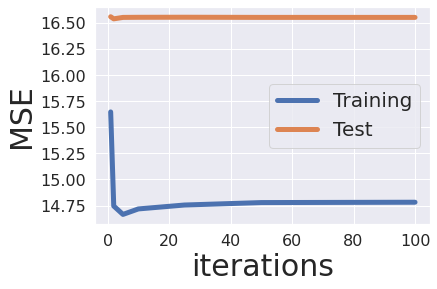

In [16]:
# 10. Plotting the result:
plot_learning_curve(iter_array, MF_ALS)

In [17]:
# Evaluation and Tuning
# Looks like we have a reasonable amount of overfitting (our test MSE is ~ 15% greater than our training MSE). 
# Also, the test MSE bottoms out around 5 iterations then actually increases after that (even more overfitting). 
# We can try adding some regularization to see if this helps to alleviate some of the overfitting.

In [18]:
MF_ALS = ExplicitMF(train, n_factors=40,user_reg=1., item_reg=1.)

iter_array = [1, 2, 5, 10, 25, 50, 100]
MF_ALS.calculate_learning_curve(iter_array, test)

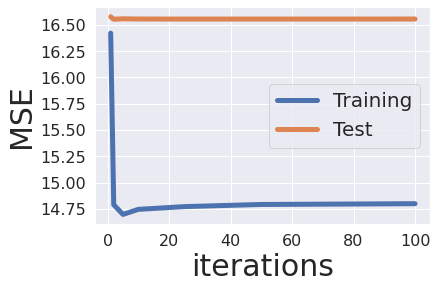

In [19]:
plot_learning_curve(iter_array, MF_ALS)

In [ ]:
# The regularization narrowed the gap between our training and test MSE, but it did not decrease the test MSE too much.
# We’ll just setup a small grid search and tune both the regularization terms and number of latent factors. 
# The item and user regularization terms will be restricted to be equal to each other.

In [20]:
latent_factors = [5, 10, 40, 60]
regularizations = [0.01, 0.1, 1., 10.]
regularizations.sort()
iter_array = [1, 2, 5, 10, 20]

best_params = {}
best_params['n_factors'] = latent_factors[0]
best_params['reg'] = regularizations[0]
best_params['n_iter'] = 0
best_params['train_mse'] = np.inf
best_params['test_mse'] = np.inf
best_params['model'] = None

for fact in latent_factors:
    print ('Factors: {}'.format(fact))
    for reg in regularizations:
        print ('Regularization: {}'.format(reg))
        MF_ALS = ExplicitMF(train, n_factors=fact, \
                            user_reg=reg, item_reg=reg)
        MF_ALS.calculate_learning_curve(iter_array, test)
        min_idx = np.argmin(MF_ALS.test_mse)
        if MF_ALS.test_mse[min_idx] < best_params['test_mse']:
            best_params['n_factors'] = fact
            best_params['reg'] = reg
            best_params['n_iter'] = iter_array[min_idx]
            best_params['train_mse'] = MF_ALS.train_mse[min_idx]
            best_params['test_mse'] = MF_ALS.test_mse[min_idx]
            best_params['model'] = MF_ALS
            print ('New optimal hyperparameters')
            print (pd.Series(best_params))

Factors: 5
Regularization: 0.01
New optimal hyperparameters
n_factors                                                 5
reg                                                    0.01
n_iter                                                   10
train_mse                                         15.975074
test_mse                                          16.517519
model        <__main__.ExplicitMF object at 0x7f7d358a08e0>
dtype: object
Regularization: 0.1
New optimal hyperparameters
n_factors                                                 5
reg                                                     0.1
n_iter                                                    2
train_mse                                          15.98552
test_mse                                          16.463168
model        <__main__.ExplicitMF object at 0x7f7d358a07c0>
dtype: object
Regularization: 1.0
Regularization: 10.0
Factors: 10
Regularization: 0.01
Regularization: 0.1
Regularization: 1.0
Regularization: 10.0
Factors: 

KeyboardInterrupt: ignored